In [173]:
import os
from argparse import Namespace
import json

import pandas as pd
import matplotlib.pyplot as plt

from train import main

In [169]:
print('Input experiment name')
message = input()

request = Namespace(
    name=message,
    data_folder='data',
    data_size=64_000,
    crop_size=256,
    batch_size=64,
    epochs=10,
    learning_rate=0.001,
    gpu=True,
    worker=1
)

 scheduler_SGD_CosineAnnealingWarmRestarts


Input experiment name


In [174]:
#!g1.1
main(request)

prediction...: 100%|██████████| 250/250 [01:50<00:00,  2.26it/s]


Reading data...
Creating model...

Tune optimizer...
scheduler CosineAnnealingWarmRestarts updated
Ready for training...
Epoch # 0:	train loss: 2.3e+02	val loss: 8.3e+01
Epoch # 1:	train loss: 6e+01	val loss: 3.9e+01
Epoch # 2:	train loss: 4.1e+01	val loss: 2.9e+01
Epoch # 3:	train loss: 3.3e+01	val loss: 2.5e+01
Epoch # 4:	train loss: 2.9e+01	val loss: 2.2e+01
Epoch # 5:	train loss: 2.6e+01	val loss: 2e+01
Epoch # 6:	train loss: 2.4e+01	val loss: 1.8e+01
Epoch # 7:	train loss: 2.2e+01	val loss: 1.7e+01
Epoch # 8:	train loss: 2.1e+01	val loss: 1.6e+01
Epoch # 9:	train loss: 1.9e+01	val loss: 1.5e+01
Create submission...


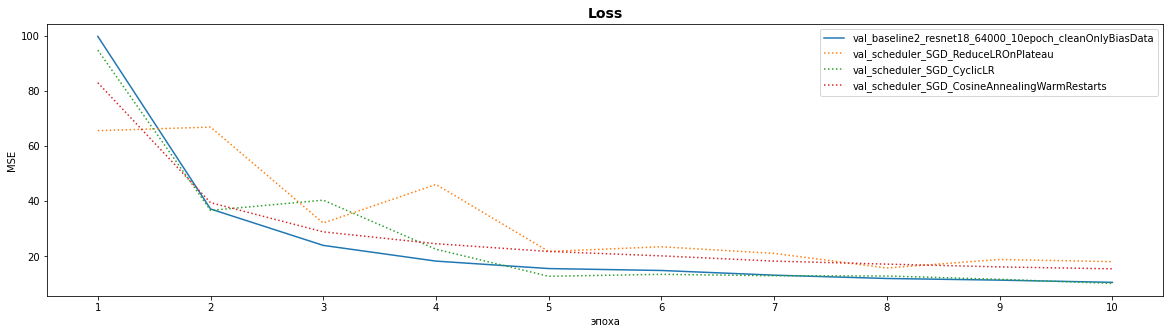

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: f
  warnings.warn(message)


In [176]:
# figure
plt.figure(figsize=(20, 5)) 
ax = plt.axes() # Add an axes to the current figure and make it the current axes

for experiment in [
    'baseline2_resnet18_64000_10epoch_cleanOnlyBiasData',
    'scheduler_SGD_ReduceLROnPlateau',
    'scheduler_SGD_CyclicLR',
    'scheduler_SGD_CosineAnnealingWarmRestarts'
]:
    
    with open(f'runs/{experiment}/metrics_{experiment}.txt') as f:
        metrics = json.load(f)

    # data
    x = range(1, len(metrics['val_loss']) + 1)
    ls = 'solid' if experiment=='baseline2_resnet18_64000_10epoch_cleanOnlyBiasData' else 'dotted'
    ax.plot(x, metrics['val_loss'], linestyle=ls, label=f'val_{experiment}')

# annotation    
ax.set_title('Loss', fontsize=14, fontweight='bold')
ax.set_xlabel('эпоха')
ax.set_ylabel('MSE')
ax.legend()
ax.set_xticks(range(1, len(metrics['train_loss']) + 1))
#_ = ax.set_ylim([70, 200])